In [1]:
import numpy as np
import tensorflow as tf
import pickle

In [2]:
from sklearn.utils import shuffle

In [3]:
import matplotlib.pyplot as plt

### Open existed training set in pickle file

In [4]:
# open existed training set
with open("./data/X_train.p", "rb") as f:
    Xtrain = pickle.load(f)

# open existed training set
with open("./data/y_train.p", "rb") as f:
    ytrain = pickle.load(f)

In [5]:
# open existed test set
with open("./data/X_test.p", "rb") as f:
    X_test = pickle.load(f)

In [6]:
Xtrain.shape

(42000, 784)

### pre-processing

#### 1. Split data set

In [7]:
X_train = Xtrain[:32000]
X_validation = Xtrain[32000:]

In [8]:
y_train = ytrain[:32000]
y_validation = ytrain[32000:]

In [9]:
test = X_validation[0]

In [10]:
test = np.reshape(test, (28,28))

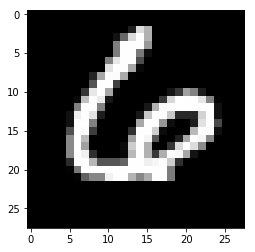

In [11]:
plt.imshow(test, cmap="gray")
plt.show()

#### 2. Visualize Data

In [12]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[1].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(ytrain))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 32000
Number of testing examples = 28000
Number of validation examples = 10000
Image data shape = (784,)
Number of classes = 10


Reshape images

In [13]:
X_train = np.reshape(X_train, (32000,28,28))

In [14]:
X_train[3].shape

(28, 28)

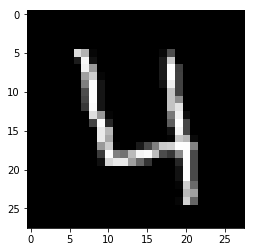

In [15]:
plt.imshow(X_train[3], cmap="gray")
plt.show()

Visualize data

In [16]:
hist, bins = np.histogram(y_train, n_classes)
center = (bins[:-1] + bins[1])/2

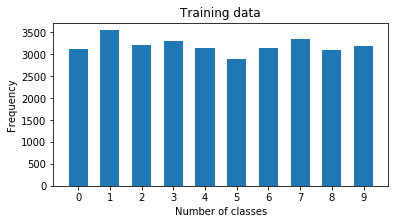

In [17]:
plt.figure(figsize=(6,3))

plt.hist(y_train, bins=n_classes, rwidth=0.6, range=[0, n_classes], align="left")
plt.xticks(np.arange(n_classes))

plt.xlabel("Number of classes")
plt.ylabel("Frequency")
plt.title("Training data")

plt.show()

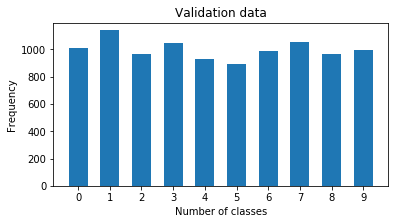

In [18]:
hist, bins = np.histogram(y_validation, n_classes)
center = (bins[:-1] + bins[1])/2

plt.figure(figsize=(6,3))

plt.hist(y_validation, bins=n_classes, rwidth=0.6, range=[0, n_classes], align="left")
plt.xticks(np.arange(n_classes))

plt.xlabel("Number of classes")
plt.ylabel("Frequency")
plt.title("Validation data")

plt.show()

Pie chart

In [24]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

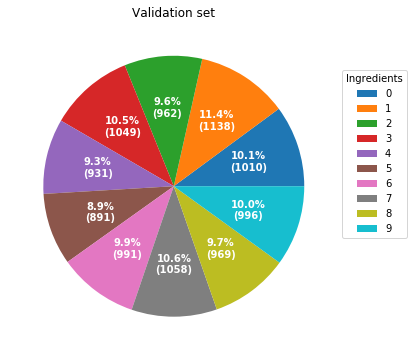

In [25]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = hist
ingredients = np.unique(y_validation)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0.1, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Validation set")

plt.show()